In [4]:
import pandas as pd

def make_sent_df(name_list, sent_list, decreasing):
    #declare return df
    df = pd.DataFrame()
    
    unique_name = list(set(name_list))
    unique_name.sort()
    # append person
    for person in  unique_name:
        df[person] = sent_list

    # not talker dealing
    for i in df.index:
        for c in df.columns:
            if name_list[i] != c:
                df.loc[i,c] = 100
    df.loc[-1,]= [0,0,0]
    df =df.sort_index()        
    for i in df.index:
        for c in df.columns:
            if df.loc[i,c] == 100:
                prev = df.loc[i-1,c]
                if prev <0.05 and prev>-0.05:
                     df.loc[i,c]=0
                elif prev>0:
                    df.loc[i,c] = df.loc[i-1,c]-decreasing
                else:
                    df.loc[i,c] = df.loc[i-1,c]+decreasing
    df.loc[len(df)-1,]= df.loc[len(df)-2,]
    df.loc[len(df)-2,]= df.loc[len(df)-3,]
    return df
        



In [21]:
from scipy.interpolate import interp1d
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def plot_time_sentiment(df):
    
    new_index = np.arange(-1, len(df)-2, 0.01)
    df2 = pd.DataFrame(index = new_index)
    
    s = ''.join(df.columns)
    print(s)
    
    for c in df.columns:
        f1 = interp1d(df.index, df[c], kind='cubic')
        df2[c] = f1(new_index)
     
    df2.index = new_index
    
    ax2 = df2.plot.line()
    ax2.set_title( s +"'s Sentimental")
    ax2.set_xlabel("time")
    ax2.set_ylabel("Sentiment")
    



ABC


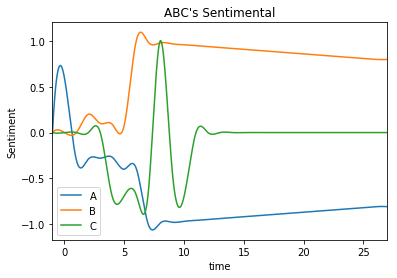

In [22]:
name_list = ['A','A','B','B','C','A','B','A','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C']
sent_list = [0.6, -0.3, 0.2, 0.1, -0.7, -0.4, 1.0, -1,1.0, -0.4, -0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] 

df = make_sent_df(name_list, sent_list, 0.01)
plot_time_sentiment(df)    

